## Loading the data and other imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




In [292]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [293]:
df.shape

(396030, 27)

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [8]:
# CODE HERE
#count of whether loan was paid or not
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

# Section 1 :Exploratory Data Analysis

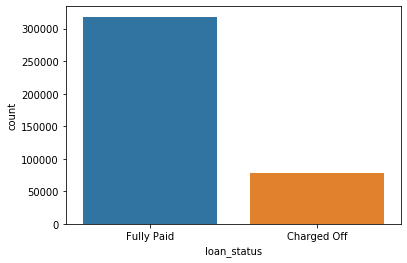

In [9]:
#count of paid and charged off loan . seems likes most of the loans have been paid off. few are charged off
sns.countplot(df['loan_status'])

Create a histogram of the loan_amnt column

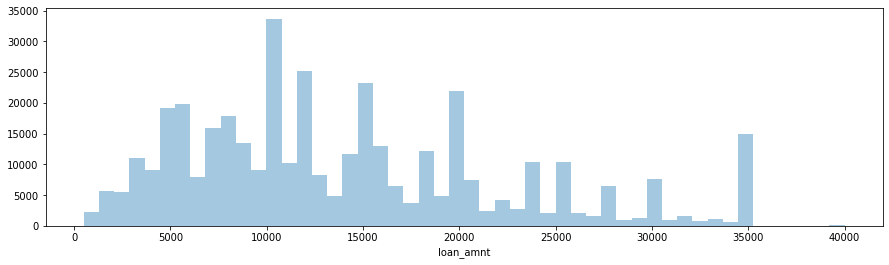

In [10]:
# CODE HERE
plt.figure(figsize=(15,4))
sns.distplot(df['loan_amnt'],bins=50,kde=False,)

explore correlation between the continuous feature variables

In [11]:
# CODE HERE
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


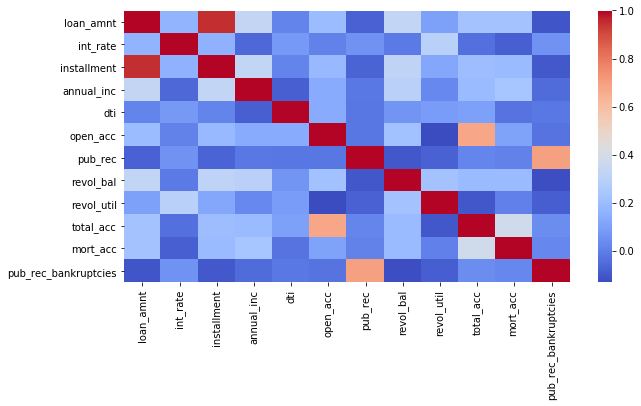

In [12]:
# CODE HERE
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm')

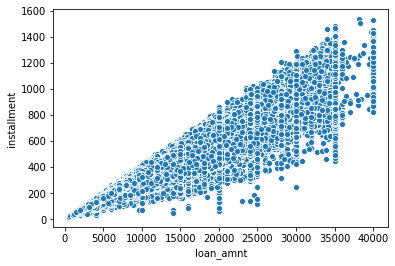

In [25]:

sns.scatterplot(x='loan_amnt',y='installment',data=df)

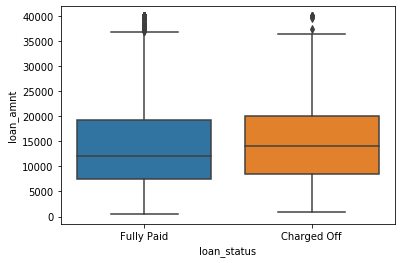

In [13]:
# CODE HERE
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [27]:

groupby_loan=df['loan_amnt'].groupby(by=df['loan_status'])
groupby_loan.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Explore the Grade and SubGrade columns that LendingClub attributes to the loans

In [28]:
# CODE HERE
df['grade'].unique()
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

**Create a countplot per grade. Set the hue to the loan_status label.**

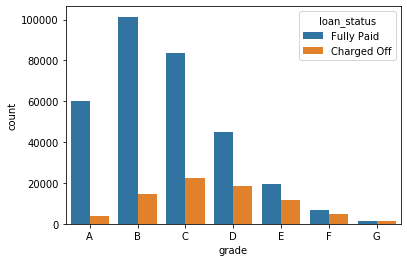

In [29]:
# CODE HERE
sns.countplot(df['grade'].sort_values(),hue=df['loan_status'])

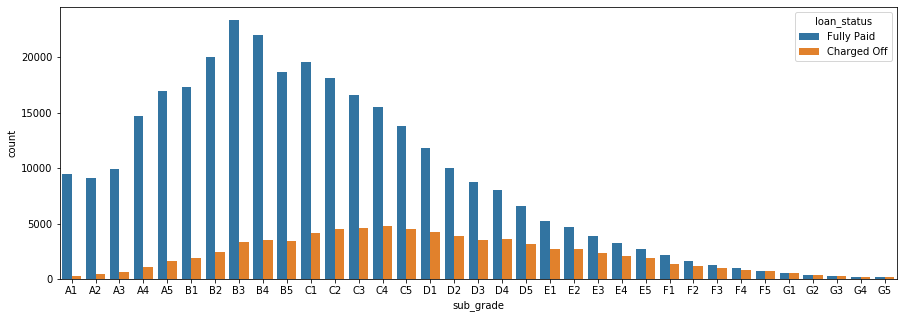

In [30]:
plt.figure(figsize=(15,5))
#CODE HERE
sns.countplot(df['sub_grade'].sort_values(),hue=df['loan_status'])

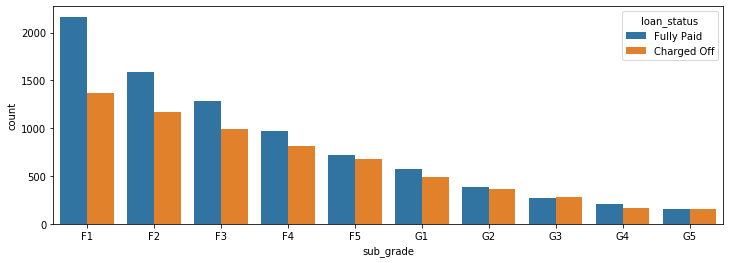

In [31]:
# CODE HERE
plt.figure(figsize=(12,4))
f_g_subgrade=df[(df['grade']=='G') | (df['grade']=='F')]

sns.countplot(f_g_subgrade['sub_grade'].sort_values(),hue=df['loan_status'])

    


**Mapping the loan repaid and loan status**

In [51]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid': 1,'Charged Off' : 0})


**Bar plot showing the correlation of the numeric features to the new loan_repaid column**

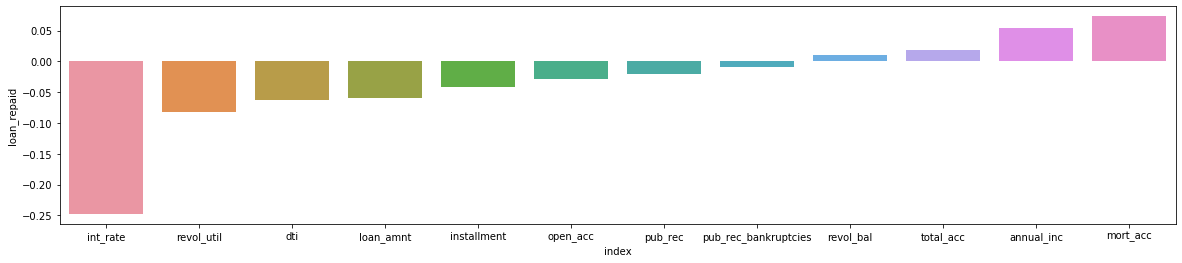

In [34]:
#CODE HERE
corr=df.corr()['loan_repaid'].sort_values().drop('loan_repaid')
corr=corr.reset_index()
plt.figure(figsize=(20,4))
plt.tight_layout
sns.barplot(x='index',y='loan_repaid',data=corr)


In [35]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

---
---
# Section 2: Data PreProcessing

 Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables



In [36]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data


**Create a Series that displays the total count of missing values per column**

In [14]:
missing_value=df.isnull().sum()
missing_value

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Convert this Series to be in term of percentage of the total DataFrame**

In [39]:
# CODE HERE
(df.isnull().sum()/len(df))*100


loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [40]:
# CODE HERE
df['emp_title'].nunique()

173105

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column**

In [53]:
# CODE HERE
df=df.drop('emp_title',axis=1)


In [16]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


 **Create a count plot of the emp_length feature column**

In [54]:
sorted(df['emp_length'].dropna().unique())
sort_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
#created a sorted list of values to pass in the plot function

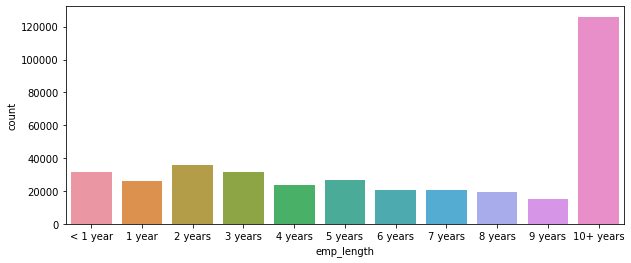

In [55]:
# CODE HERE
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=sort_order)


 **Plot out the countplot with a hue separating Fully Paid vs Charged Off**

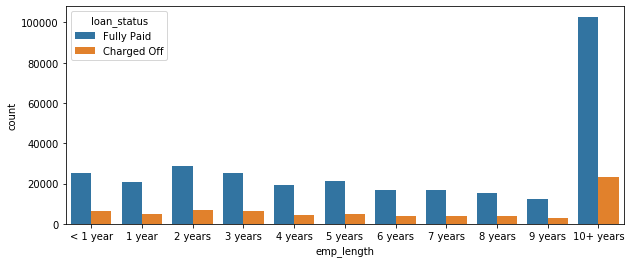

In [45]:
# CODE HERE
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',hue='loan_status',data=df,order=sort_order)

**calculate the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan**

In [46]:
# CODE HERE
total_emp=df['emp_length'].value_counts()


In [47]:
people_co=df[df['loan_status']=="Charged Off"].groupby('emp_length').count()['loan_status']
people_df=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_cat=people_co/people_df
emp_cat

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

**Charge off rates are extremely similar across all employment lengths. drop the columns**

In [56]:
# CODE HERE
df=df.drop('emp_length',axis=1)

Revisit the DataFrame to see what feature columns still have missing data.

In [57]:
df.isnull().sum()


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Review the title column vs the purpose column

In [50]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column. Drop the columns

In [58]:
# CODE HERE
df=df.drop('title',axis=1)

In [ ]:
# filling the missing values of mort_acc using mean of total_acc values

In [21]:
# CODE HERE
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [60]:
df.corr()['mort_acc'].sort_values()
#correlated with total_Acc

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

 the total_acc feature correlates with the mort_acc. try this fillna() approach , group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry

In [61]:
total_acc_mean=df.groupby(by='total_acc').mean()['mort_acc']
total_acc_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. 

 

In [62]:
total_acc_mean.iloc[2]

0.0667433831990794

In [63]:
# CODE HERE
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        mort_acc=total_acc_mean[total_acc]
    else:
        mort_acc=mort_acc
    return mort_acc

In [64]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [67]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables


In [62]:
# CODE HERE
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')



### term feature
Convert the term feature into either a 36 or 60 integer numeric data type

In [68]:
df['term']=df['term'].apply(lambda x:int(x[:3]))

In [69]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

### grade feature

 grade is part of sub_grade, so just drop the grade feature

In [70]:
# CODE HERE
df=df.drop(['grade','sub_grade'],axis=1)

### verification_status, application_type,initial_list_status,purpose 
 Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.

In [71]:
# CODE HERE
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership


In [72]:
#CODE HERE
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Convert these to dummy variables, but replace  NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe

In [73]:
#CODE HERE
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')



0             RENT
1         MORTGAGE
2             RENT
3             RENT
4         MORTGAGE
            ...   
396025        RENT
396026    MORTGAGE
396027        RENT
396028    MORTGAGE
396029        RENT
Name: home_ownership, Length: 395219, dtype: object

In [74]:
ownership=pd.get_dummies(df['home_ownership'])
df=pd.concat([df.drop('home_ownership',axis=1),ownership],axis=1)

In [75]:
#CODE HERE
df=df.drop(['address','issue_d','loan_status'],axis=1)


In [77]:
#CODE HERE
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda x:int(x[4:]))

In [130]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  int64  
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

# Section 3 : Model Training

## Splitting the data into training set , validation test and test set


In [79]:
# CODE HERE
from sklearn.model_selection import train_test_split


In [178]:

train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('loan_repaid'))
val_labels = np.array(val_df.pop('loan_repaid'))
test_labels = np.array(test_df.pop('loan_repaid'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)


In [179]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,MORTGAGE,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,0,0,0,0,1,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,0,0,0,0,0,1,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,0,0,0,0,0,1,0,0,0


In [86]:
from sklearn.preprocessing import StandardScaler

In [180]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (252940,)
Validation labels shape: (63235,)
Test labels shape: (79044,)
Training features shape: (252940, 36)
Validation features shape: (63235, 36)
Test features shape: (79044, 36)


# Creating the Model



In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K

In [183]:
# Creating a MLP model
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

from tensorflow import keras
METRICS = [
      get_f1,
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
    
      

]
model = keras.Sequential([
      keras.layers.Dense(16, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',bias_initializer='he_normal'),
  ])

model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)





 Fit the model to the training data for at least 100 epochs. Also add in the validation data for later plotting

In [184]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [187]:
# Training the model using MLP

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
class_weight = {0: 4.25,
                1: 1.}
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    class_weight=class_weight,
    validation_data=(val_features, val_labels))


Train on 252940 samples, validate on 63235 samples
Epoch 1/100
252940/252940 [==============================] - 10s 40us/sample - loss: 1.4201 - get_f1: 0.4253 - tp: 58785.0000 - fp: 8967.0000 - tn: 40618.0000 - fn: 144570.0000 - accuracy: 0.3930 - precision: 0.8676 - recall: 0.2891 - auc: 0.5844 - val_loss: 1.1032 - val_get_f1: 0.5552 - val_tp: 20337.0000 - val_fp: 2219.0000 - val_tn: 10337.0000 - val_fn: 30342.0000 - val_accuracy: 0.4851 - val_precision: 0.9016 - val_recall: 0.4013 - val_auc: 0.6792
Epoch 2/100
252940/252940 [==============================] - 4s 17us/sample - loss: 1.2361 - get_f1: 0.5704 - tp: 86088.0000 - fp: 12343.0000 - tn: 37242.0000 - fn: 117267.0000 - accuracy: 0.4876 - precision: 0.8746 - recall: 0.4233 - auc: 0.6257 - val_loss: 1.0626 - val_get_f1: 0.6145 - val_tp: 23630.0000 - val_fp: 2574.0000 - val_tn: 9982.0000 - val_fn: 27049.0000 - val_accuracy: 0.5315 - val_precision: 0.9018 - val_recall: 0.4663 - val_auc: 0.6943
Epoch 3/100
252940/252940 [===========

Epoch 19/100
252940/252940 [==============================] - 4s 14us/sample - loss: 1.0538 - get_f1: 0.6610 - tp: 107002.0000 - fp: 13404.0000 - tn: 36181.0000 - fn: 96353.0000 - accuracy: 0.5661 - precision: 0.8887 - recall: 0.5262 - auc: 0.6849 - val_loss: 1.0255 - val_get_f1: 0.7109 - val_tp: 29966.0000 - val_fp: 3647.0000 - val_tn: 8909.0000 - val_fn: 20713.0000 - val_accuracy: 0.6148 - val_precision: 0.8915 - val_recall: 0.5913 - val_auc: 0.7088
Epoch 20/100
252940/252940 [==============================] - 3s 14us/sample - loss: 1.0521 - get_f1: 0.6665 - tp: 108475.0000 - fp: 13650.0000 - tn: 35935.0000 - fn: 94880.0000 - accuracy: 0.5709 - precision: 0.8882 - recall: 0.5334 - auc: 0.6858 - val_loss: 1.0257 - val_get_f1: 0.7030 - val_tp: 29379.0000 - val_fp: 3511.0000 - val_tn: 9045.0000 - val_fn: 21300.0000 - val_accuracy: 0.6076 - val_precision: 0.8933 - val_recall: 0.5797 - val_auc: 0.7092
Epoch 21/100
252940/252940 [==============================] - 3s 13us/sample - loss: 1.0

Epoch 37/100
252940/252940 [==============================] - 3s 13us/sample - loss: 1.0351 - get_f1: 0.7008 - tp: 117370.0000 - fp: 14201.0000 - tn: 35384.0000 - fn: 85985.0000 - accuracy: 0.6039 - precision: 0.8921 - recall: 0.5772 - auc: 0.6982 - val_loss: 1.0239 - val_get_f1: 0.7122 - val_tp: 30060.0000 - val_fp: 3658.0000 - val_tn: 8898.0000 - val_fn: 20619.0000 - val_accuracy: 0.6161 - val_precision: 0.8915 - val_recall: 0.5931 - val_auc: 0.7109
Epoch 38/100
252940/252940 [==============================] - 4s 14us/sample - loss: 1.0351 - get_f1: 0.6987 - tp: 116836.0000 - fp: 14201.0000 - tn: 35384.0000 - fn: 86519.0000 - accuracy: 0.6018 - precision: 0.8916 - recall: 0.5745 - auc: 0.6983 - val_loss: 1.0237 - val_get_f1: 0.7175 - val_tp: 30453.0000 - val_fp: 3746.0000 - val_tn: 8810.0000 - val_fn: 20226.0000 - val_accuracy: 0.6209 - val_precision: 0.8905 - val_recall: 0.6009 - val_auc: 0.7108
Epoch 39/100
252940/252940 [==============================] - 3s 13us/sample - loss: 1.0

Epoch 55/100
252940/252940 [==============================] - 3s 13us/sample - loss: 1.0358 - get_f1: 0.6977 - tp: 116444.0000 - fp: 13984.0000 - tn: 35601.0000 - fn: 86911.0000 - accuracy: 0.6011 - precision: 0.8928 - recall: 0.5726 - auc: 0.6985 - val_loss: 1.0234 - val_get_f1: 0.7185 - val_tp: 30518.0000 - val_fp: 3746.0000 - val_tn: 8810.0000 - val_fn: 20161.0000 - val_accuracy: 0.6219 - val_precision: 0.8907 - val_recall: 0.6022 - val_auc: 0.7111
Epoch 56/100
252940/252940 [==============================] - 3s 14us/sample - loss: 1.0354 - get_f1: 0.7006 - tp: 117274.0000 - fp: 14111.0000 - tn: 35474.0000 - fn: 86081.0000 - accuracy: 0.6039 - precision: 0.8926 - recall: 0.5767 - auc: 0.6984 - val_loss: 1.0240 - val_get_f1: 0.7044 - val_tp: 29469.0000 - val_fp: 3503.0000 - val_tn: 9053.0000 - val_fn: 21210.0000 - val_accuracy: 0.6092 - val_precision: 0.8938 - val_recall: 0.5815 - val_auc: 0.7112
Epoch 57/100
252940/252940 [==============================] - 3s 13us/sample - loss: 1.0

252940/252940 [==============================] - 4s 17us/sample - loss: 1.0358 - get_f1: 0.6969 - tp: 116238.0000 - fp: 13959.0000 - tn: 35626.0000 - fn: 87117.0000 - accuracy: 0.6004 - precision: 0.8928 - recall: 0.5716 - auc: 0.6984 - val_loss: 1.0238 - val_get_f1: 0.7109 - val_tp: 29954.0000 - val_fp: 3626.0000 - val_tn: 8930.0000 - val_fn: 20725.0000 - val_accuracy: 0.6149 - val_precision: 0.8920 - val_recall: 0.5911 - val_auc: 0.71127.0000 - fn: 42927.0000 - accuracy: 0.6011 - precisio
Epoch 73/100
252940/252940 [==============================] - 4s 16us/sample - loss: 1.0357 - get_f1: 0.6989 - tp: 116823.0000 - fp: 14055.0000 - tn: 35530.0000 - fn: 86532.0000 - accuracy: 0.6023 - precision: 0.8926 - recall: 0.5745 - auc: 0.6983 - val_loss: 1.0232 - val_get_f1: 0.7124 - val_tp: 30070.0000 - val_fp: 3654.0000 - val_tn: 8902.0000 - val_fn: 20609.0000 - val_accuracy: 0.6163 - val_precision: 0.8916 - val_recall: 0.5933 - val_auc: 0.7113
Epoch 74/100
252940/252940 [====================

252940/252940 [==============================] - 4s 15us/sample - loss: 1.0363 - get_f1: 0.6985 - tp: 116661.0000 - fp: 14016.0000 - tn: 35569.0000 - fn: 86694.0000 - accuracy: 0.6018 - precision: 0.8927 - recall: 0.5737 - auc: 0.6980 - val_loss: 1.0237 - val_get_f1: 0.7161 - val_tp: 30345.0000 - val_fp: 3716.0000 - val_tn: 8840.0000 - val_fn: 20334.0000 - val_accuracy: 0.6197 - val_precision: 0.8909 - val_recall: 0.5988 - val_auc: 0.7111
Epoch 90/100
252940/252940 [==============================] - 4s 17us/sample - loss: 1.0355 - get_f1: 0.7002 - tp: 117188.0000 - fp: 14128.0000 - tn: 35457.0000 - fn: 86167.0000 - accuracy: 0.6035 - precision: 0.8924 - recall: 0.5763 - auc: 0.6982 - val_loss: 1.0237 - val_get_f1: 0.7080 - val_tp: 29748.0000 - val_fp: 3596.0000 - val_tn: 8960.0000 - val_fn: 20931.0000 - val_accuracy: 0.6121 - val_precision: 0.8922 - val_recall: 0.5870 - val_auc: 0.7112
Epoch 91/100
252940/252940 [==============================] - 4s 16us/sample - loss: 1.0356 - get_f1:

In [252]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    for n,metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.gcf().set_size_inches(8.5, 5)
        plt.plot(history.epoch,  history.history[metric], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
            linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        
        
        plt.legend()
        plt.tight_layout()
        

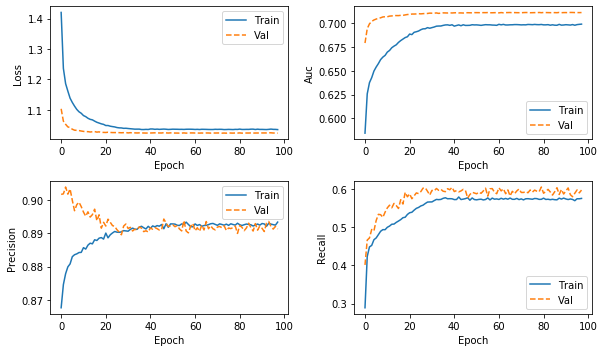

In [253]:
plot_metrics(baseline_history)



# Section 4: Evaluating Model Performance.



In [263]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
def plot_cm(labels, predictions, p=0.5):
        cm =confusion_matrix(labels, predictions > p)
        plt.figure(figsize=(5,5))
        sns.heatmap(cm, annot=True, fmt="d")
        plt.title('Confusion matrix')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')


In [277]:
train_predictions = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions = model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6380929741159177
get_f1 :  0.70928514
tp :  37407.0
fp :  4406.0
tn :  10976.0
fn :  26255.0
accuracy :  0.6121021
precision :  0.8946261
recall :  0.5875876
auc :  0.7100255


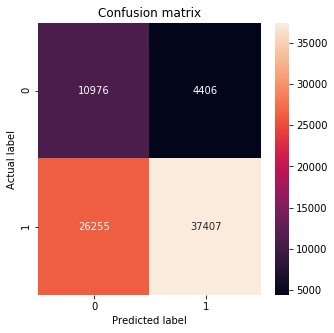

In [290]:
evaluate_test = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, evaluate_test):
    print(name, ': ', value)
    
plot_cm(test_labels,test_predictions)



In [285]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
   


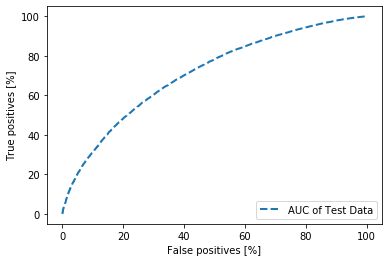

In [288]:
from sklearn.metrics import roc_curve

plot_roc("AUC score of Test Data", test_labels, test_predictions, linestyle='--')
plt.legend(loc='lower right')